# Trabajo de Fin de Master
Sergio Marchena
UNAV - 2024

In [123]:
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json as json

In [103]:
api_key = ''
url = "https://api.footprint.network/api/v1/native/async"

query = " select * from token_price_5min where token_symbol = 'RIF' limit 1 "

query2 = " select date(timestamp) as Date, avg(price) as Price, token_symbol as Symbol from token_price_5min where token_symbol in ('DOC','RIF') and chain = 'Rootstock' group by 1,3 order by 1 desc limit 180 "
query2 = query2 [1:-1]

payload = { "query": query2}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "api-key": api_key
}

response = requests.post(url, json=payload, headers=headers).json()
ok = response['message']
execution_id = response['data']['execution_id']

print(ok)
print(execution_id)


success
e8e675a8-acc3-4b8c-bbea-9ae3fece8154


In [118]:
url = 'https://api.footprint.network/api/v1/native/' + execution_id + '/results'

headers = {
    "accept": "application/json",
    "api-key": api_key
}

response = requests.get(url, headers=headers).json()

respuesta = response['data']['result']

df = pd.DataFrame(respuesta)
df


,date,price,symbol
0,2024-05-21,1.043451,DOC
1,2024-05-21,0.163520,RIF
2,2024-05-20,0.160766,RIF
3,2024-05-20,1.005695,DOC
4,2024-05-19,0.996127,DOC
...,...,...,...
95,2024-04-04,0.999314,DOC
96,2024-04-03,0.996606,DOC
97,2024-04-03,0.254798,RIF
98,2024-04-02,0.995566,DOC


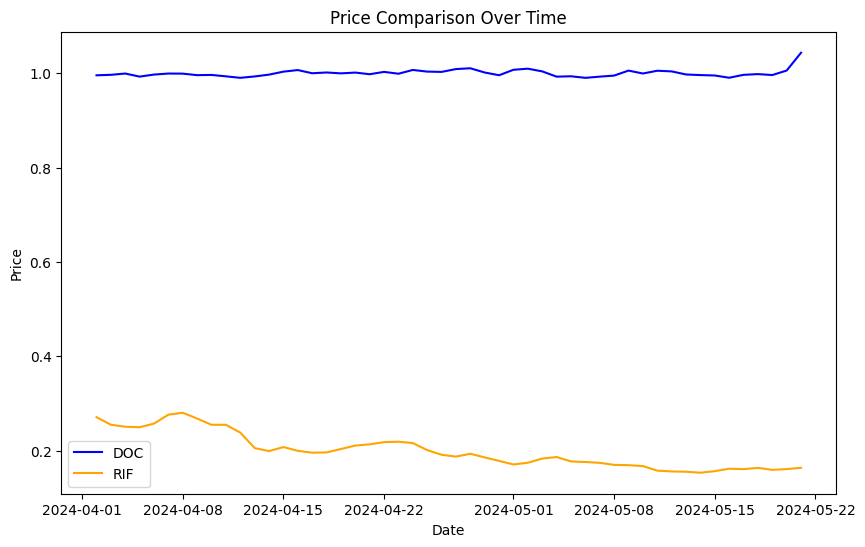

In [126]:
df['date'] = pd.to_datetime(df['date'])

df_chain1 = df[df['symbol'] == 'DOC']
df_chain2 = df[df['symbol'] == 'RIF']

plt.figure(figsize=(10, 6))

plt.plot(df_chain1['date'], df_chain1['price'], label='DOC', color='blue')
plt.plot(df_chain2['date'], df_chain2['price'], label='RIF', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Comparison Over Time')
plt.legend()

plt.show()